In [ ]:
# !pip install suite2p
# !pip install scanimage-tiff-reader

### Run GUI

In [9]:
!python -m suite2p

objc[77217]: Class FIFinderSyncExtensionHost is implemented in both /System/Library/PrivateFrameworks/FinderKit.framework/Versions/A/FinderKit (0x7fffaad073d8) and /System/Library/PrivateFrameworks/FileProvider.framework/OverrideBundles/FinderSyncCollaborationFileProviderOverride.bundle/Contents/MacOS/FinderSyncCollaborationFileProviderOverride (0x1c2cf54f50). One of the two will be used. Which one is undefined.
/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/ChAT_gCaMP6s_example2/analysis/suite2p/plane0/stat.npy
no channel 2 labels found (redcell.npy)
0
/Users/angueyraaristjm/anaconda3/lib/python3.7/site-packages/suite2p/fig.py:134: RuntimeWarning: invalid value encountered in true_divide
  istat = istat / (istat99-istat1)
/Users/angueyraaristjm/anaconda3/lib/python3.7/site-packages/suite2p/fig.py:135: RuntimeWarning: invalid value encountered in minimum
  istat = np.maximum(0, np.minimum(1, istat))
/Users/angueyraaristjm/anaconda3/lib/python3.7/site-packages/suite2p/fig.py:135: 

### Run with code

> Notes:

> Would be great to extract things from tiff files beforehand including:

> fs (sampling rate)

> length (to inform nimg_init)

> number of channels 

SciScan Tiff Reader does not support compressed data. Make sure to save as uncompressed OME-TIFF from ImageJ/FIJI

In [7]:
import numpy as np
import sys
import suite2p
from suite2p.run_s2p import run_s2p
import matplotlib.pyplot as plt


# set your options for running
# overwrites the run_s2p.default_ops
ops = {
        'fast_disk': [], # used to store temporary binary file, defaults to save_path0 (set as a string NOT a list)
        'save_path0': [], # stores results, defaults to first item in data_path
        'delete_bin': False, # whether to delete binary file after processing
        # main settings
        'nplanes' : 1, # each tiff has these many planes in sequence
        'nchannels' : 1, # each tiff has these many channels per plane
        'functional_chan' : 1, # this channel is used to extract functional ROIs (1-based)
        'diameter':4.5, # this is the main parameter for cell detection, 2-dimensional if Y and X are different (e.g. [6 12])
        'tau':  2.0, # this is the main parameter for deconvolution (GCaMP6f = 0.7; GCaMP6m = 1.25; GCaMP6s = 2.0)
        'fs': 6.1,  # sampling rate (total across planes) (128 x 128 = 12.2; 256 x 128 = 6.1)
        # output settings
        'save_mat': False, # whether to save output as matlab files
        'combined': True, # combine multiple planes into a single result /single canvas for GUI
        # parallel settings
        'num_workers': 0, # 0 to select num_cores, -1 to disable parallelism, N to enforce value
        'num_workers_roi': -1, # 0 to select number of planes, -1 to disable parallelism, N to enforce value
        # registration settings
        'do_registration': True, # whether to register data
        'nimg_init': 200, # subsampled frames for finding reference image
        'batch_size': 200, # number of frames per batch
        'maxregshift': 0.1, # max allowed registration shift, as a fraction of frame max(width and height)
        'align_by_chan' : 1, # when multi-channel, you can align by non-functional channel (1-based)
        'reg_tif': True, # whether to save registered tiffs
        'subpixel' : 10, # precision of subpixel registration (1/subpixel steps)
        'nonrigid': False, # wheter to perform non-rigid registration
        # cell detection settings
        'connected': False, # whether or not to keep ROIs fully connected (set to 0 for dendrites)
        'navg_frames_svd': 5000, # max number of binned frames for the SVD
        'nsvd_for_roi': 1000, # max number of SVD components to keep for ROI detection
        'max_iterations': 20, # maximum number of iterations to do cell detection
        'ratio_neuropil': 6., # ratio between neuropil basis size and cell radius
        'ratio_neuropil_to_cell': 3, # minimum ratio between neuropil radius and cell radius
        'tile_factor': 1., # use finer (>1) or coarser (<1) tiles for neuropil estimation during cell detection
        'threshold_scaling': 1., # adjust the automatically determined threshold by this scalar multiplier
        'max_overlap': 0.75, # cells with more overlap than this get removed during triage, before refinement
        'inner_neuropil_radius': 2, # number of pixels to keep between ROI and neuropil donut
        'outer_neuropil_radius': np.inf, # maximum neuropil radius
        'min_neuropil_pixels': 350, # minimum number of pixels in the neuropil
        # deconvolution settings
        'baseline': 'maximin', # baselining mode
        'win_baseline': 60., # window for maximin
        'sig_baseline': 10., # smoothing constant for gaussian filter
        'prctile_baseline': 8.,# optional (whether to use a percentile baseline)
        'neucoeff': .7,  # neuropil coefficient
      }

In [2]:
# provide an h5 path in 'h5py' or a tiff path in 'data_path'
# db overwrites any ops (allows for experiment specific settings)
db = {
      'h5py': [], # a single h5 file path
      'h5py_key': 'data',
      'look_one_level_down': False, # whether to look in ALL subfolders when searching for tiffs
#       'data_path': ['/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/20190502_ChATgCaMP6s_6dpf_partial/test'], # a list of folders with tiffs 
      'data_path': ['/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/ChAT_gCaMP6s_example2/analysis'], # a list of folders with tiffs 
                                             # (or folder of folders with tiffs if look_one_level_down is True, or subfolders is not empty)
                                            
      'subfolders': [], # choose subfolders of 'data_path' to look in (optional)
      'fast_disk': [], # string which specifies where the binary file will be stored (should be an SSD)
    }

# run one experiment
opsEnd=run_s2p(ops=ops,db=db)

Found 1 tifs
840
time 0.6850. Wrote tifs to binaries for 1 planes
/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/ChAT_gCaMP6s_example2/analysis/suite2p/plane0/data_raw.bin
computed reference frame for registration
/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/ChAT_gCaMP6s_example2/analysis/suite2p/plane0/reg_tif
registered 840/840 frames in time 6.67
computed registration metrics in time 11.56
time 23.3444. Registration complete for 1 planes


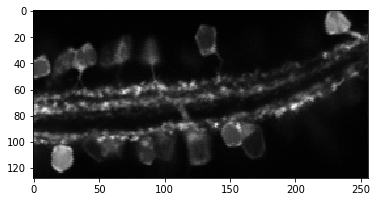

In [8]:
imgData = refImg.item()['refImg']
plt.imshow(imgData, cmap=plt.cm.gray, interpolation='nearest')

In [ ]:
# make a list of db's and loop over them
db = []
db.append({'data_path': ['C:/Users/carse/github/tiffs']})
db.append({'data_path': ['C:/Users/carse/github/tiffs2']})

for dbi in db:
    opsEnd=run_s2p(ops=ops,db=dbi)

In [ ]:
# only run on specified tiffs
db = {
      'h5py': [], # a single h5 file path
      'h5py_key': 'data',
      'look_one_level_down': False, # whether to look in ALL subfolders when searching for tiffs
      'data_path': ['C:/Users/carse/github/tiffs/'], 
                            # a list of folders with tiffs 
                            # (or folder of folders with tiffs if look_one_level_down is True, or subfolders is not empty)
                            
      'subfolders': [], # choose subfolders of 'data_path' to look in (optional)
      'fast_disk': 'C:/BIN', # string which specifies where the binary file will be stored (should be an SSD)
      'tiff_list': ['file022.tif', 'file023.tif'] # list of tiffs in folder * data_path *!
    }


# run one experiment
opsEnd=run_s2p(ops=ops,db=db)

In [ ]:
def get_nFrames(ops):
    nbytes = os.path.getsize(ops['reg_file'])
    nFrames = int(nbytes/(2* ops['Ly'] *  ops['Lx']))
    return nFrames

In [ ]:
ops1 = np.load('/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/20190502_ChATgCaMP6s_6dpf_partial/test/suite2p/ops1.npy')
ops = np.load('/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/20190502_ChATgCaMP6s_6dpf_partial/test/suite2p/plane0/ops.npy')

In [ ]:
ops

In [ ]:
ops.shape

In [ ]:
import os
os.path.getsize(ops['reg_file'])